Librerias Requeridas

In [173]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests

In [10]:
import json

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [78]:
from urllib.parse import urlparse

In [ ]:
import pandas as pd

In [169]:
import os

Extracción 

In [13]:
## Lectura de DataFrame con toda la estructura JSON, exploracion de datos, columnas

In [14]:
def load_json()
 
with open(json_filename, "r") as json_file:
    data_list = json.load(json_file) 

    first_dict = data_list
    df_episodes = pd.json_normalize(first_dict)
    print(df_episodes)


         id                                                url           name  \
0   2604879  https://www.tvmaze.com/episodes/2604879/na-str...       Серия 13   
1   2610181  https://www.tvmaze.com/episodes/2610181/zamaac...        Серия 3   
2   2598421  https://www.tvmaze.com/episodes/2598421/posled...       Серия 03   
3   2599349  https://www.tvmaze.com/episodes/2599349/61st-s...      The Offer   
4   2561116  https://www.tvmaze.com/episodes/2561116/wu-she...    Episode 357   
..      ...                                                ...            ...   
86  2544464  https://www.tvmaze.com/episodes/2544464/wwe-nx...     Episode 32   
87  2560157  https://www.tvmaze.com/episodes/2560157/forsta...      Avsnitt 9   
88  2617225  https://www.tvmaze.com/episodes/2617225/no-lim...     Episódio 7   
89  2599200  https://www.tvmaze.com/episodes/2599200/politi...  Brann i blokk   
90  2612115  https://www.tvmaze.com/episodes/2612115/the-ul...     Episode 11   

    season  number     type

In [15]:
df_episodes.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,...,_embedded.show.network.country.code,_embedded.show.network.country.timezone,_embedded.show.network.officialSite,_embedded.show.webChannel.country,image.medium,image.original,_embedded.show.dvdCountry.name,_embedded.show.dvdCountry.code,_embedded.show.dvdCountry.timezone,_embedded.show.webChannel
0,2604879,https://www.tvmaze.com/episodes/2604879/na-str...,Серия 13,2,5,regular,2023-08-08,,2023-08-08T00:00:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2610181,https://www.tvmaze.com/episodes/2610181/zamaac...,Серия 3,1,3,regular,2023-08-08,,2023-08-08T00:00:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2598421,https://www.tvmaze.com/episodes/2598421/posled...,Серия 03,1,3,regular,2023-08-08,,2023-08-08T00:00:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2599349,https://www.tvmaze.com/episodes/2599349/61st-s...,The Offer,2,7,regular,2023-08-08,,2023-08-08T02:00:00+00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2561116,https://www.tvmaze.com/episodes/2561116/wu-she...,Episode 357,1,357,regular,2023-08-08,10:00,2023-08-08T02:00:00+00:00,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
type(df_episodes)

pandas.core.frame.DataFrame

In [17]:
 for column in df_episodes:
...   print(column)

id
url
name
season
number
type
airdate
airtime
airstamp
runtime
image
summary
rating.average
_links.self.href
_links.show.href
_embedded.show.id
_embedded.show.url
_embedded.show.name
_embedded.show.type
_embedded.show.language
_embedded.show.genres
_embedded.show.status
_embedded.show.runtime
_embedded.show.averageRuntime
_embedded.show.premiered
_embedded.show.ended
_embedded.show.officialSite
_embedded.show.schedule.time
_embedded.show.schedule.days
_embedded.show.rating.average
_embedded.show.weight
_embedded.show.network
_embedded.show.webChannel.id
_embedded.show.webChannel.name
_embedded.show.webChannel.country.name
_embedded.show.webChannel.country.code
_embedded.show.webChannel.country.timezone
_embedded.show.webChannel.officialSite
_embedded.show.dvdCountry
_embedded.show.externals.tvrage
_embedded.show.externals.thetvdb
_embedded.show.externals.imdb
_embedded.show.image.medium
_embedded.show.image.original
_embedded.show.summary
_embedded.show.updated
_embedded.show._links.s

In [98]:
## Extraccion del DataFrame 1 de acuerdo a los datos del primer nivel del JSON, datos requeridos para calculo de runtime promedio

df_series = pd.DataFrame(df_episodes, columns = ['id', 'url','name','season','number','type','image'])

In [99]:
print(df_series)

         id                                                url           name  \
0   2604879  https://www.tvmaze.com/episodes/2604879/na-str...       Серия 13   
1   2610181  https://www.tvmaze.com/episodes/2610181/zamaac...        Серия 3   
2   2598421  https://www.tvmaze.com/episodes/2598421/posled...       Серия 03   
3   2599349  https://www.tvmaze.com/episodes/2599349/61st-s...      The Offer   
4   2561116  https://www.tvmaze.com/episodes/2561116/wu-she...    Episode 357   
..      ...                                                ...            ...   
86  2544464  https://www.tvmaze.com/episodes/2544464/wwe-nx...     Episode 32   
87  2560157  https://www.tvmaze.com/episodes/2560157/forsta...      Avsnitt 9   
88  2617225  https://www.tvmaze.com/episodes/2617225/no-lim...     Episódio 7   
89  2599200  https://www.tvmaze.com/episodes/2599200/politi...  Brann i blokk   
90  2612115  https://www.tvmaze.com/episodes/2612115/the-ul...     Episode 11   

    season  number     type

In [144]:
df_countries = pd.DataFrame(df_episodes, columns = ['_embedded.show.network.country.code','_embedded.show.network.country.name','_embedded.show.network.country.timezone'])

In [152]:
df_countries = df_countries.groupby(['_embedded.show.network.country.code','_embedded.show.network.country.name']).agg({'_embedded.show.network.country.timezone': 'count'}).reset_index()
print(df_countries)    

  _embedded.show.network.country.code _embedded.show.network.country.name  \
0                                  BR                              Brazil   
1                                  CN                               China   
2                                  HK                           Hong Kong   
3                                  KR                  Korea, Republic of   
4                                  US                       United States   

   _embedded.show.network.country.timezone  
0                                        1  
1                                        6  
2                                        1  
3                                        3  
4                                        1  


In [20]:
## Extraccion de DataFrames de acuerdo a los datos del segundo nivel del JSON

df_rating = pd.DataFrame(df_episodes, columns = ['id', 'rating.average'])

In [21]:
print(df_rating)

         id  rating.average
0   2604879             NaN
1   2610181             NaN
2   2598421             NaN
3   2599349             NaN
4   2561116             NaN
..      ...             ...
86  2544464             NaN
87  2560157             NaN
88  2617225             NaN
89  2599200             NaN
90  2612115             NaN

[91 rows x 2 columns]


In [130]:
df_series_data = pd.DataFrame(df_episodes, columns = ['id','airdate','airtime','airstamp','runtime','_embedded.show.network.country.code'])

In [100]:
print(df_series_data)

         id     airdate airtime                   airstamp  runtime  \
0   2604879  2023-08-08          2023-08-08T00:00:00+00:00      NaN   
1   2610181  2023-08-08          2023-08-08T00:00:00+00:00      NaN   
2   2598421  2023-08-08          2023-08-08T00:00:00+00:00      NaN   
3   2599349  2023-08-08          2023-08-08T02:00:00+00:00      NaN   
4   2561116  2023-08-08   10:00  2023-08-08T02:00:00+00:00      5.0   
..      ...         ...     ...                        ...      ...   
86  2544464  2023-08-08   20:00  2023-08-09T00:00:00+00:00    120.0   
87  2560157  2023-08-08   02:00  2023-08-09T00:00:00+00:00     30.0   
88  2617225  2023-08-08   22:30  2023-08-09T00:30:00+00:00     90.0   
89  2599200  2023-08-08   03:00  2023-08-09T01:00:00+00:00     25.0   
90  2612115  2023-08-08   22:00  2023-08-09T02:00:00+00:00     60.0   

   _embedded.show.network.country.code  
0                                  NaN  
1                                  NaN  
2                       

In [22]:
df_links = pd.DataFrame(df_episodes, columns = ['id', '_links.self.href','_links.show.href'])

In [23]:
print(df_links)

         id                         _links.self.href  \
0   2604879  https://api.tvmaze.com/episodes/2604879   
1   2610181  https://api.tvmaze.com/episodes/2610181   
2   2598421  https://api.tvmaze.com/episodes/2598421   
3   2599349  https://api.tvmaze.com/episodes/2599349   
4   2561116  https://api.tvmaze.com/episodes/2561116   
..      ...                                      ...   
86  2544464  https://api.tvmaze.com/episodes/2544464   
87  2560157  https://api.tvmaze.com/episodes/2560157   
88  2617225  https://api.tvmaze.com/episodes/2617225   
89  2599200  https://api.tvmaze.com/episodes/2599200   
90  2612115  https://api.tvmaze.com/episodes/2612115   

                      _links.show.href  
0   https://api.tvmaze.com/shows/63169  
1   https://api.tvmaze.com/shows/69820  
2   https://api.tvmaze.com/shows/69937  
3   https://api.tvmaze.com/shows/40916  
4   https://api.tvmaze.com/shows/54033  
..                                 ...  
86   https://api.tvmaze.com/shows/2266  

In [69]:
## Extraccion del DataFrame de acuerdo a JSON, datos requeridos para extraccion de URL para listar dominios WEB
df_embedded = pd.DataFrame(df_episodes, columns = ['id', '_embedded.show.id','_embedded.show.url','_embedded.show.name','_embedded.show.type','_embedded.show.language','_embedded.show.status','_embedded.show.runtime','_embedded.show.averageRuntime','_embedded.show.officialSite'])

In [70]:
print(df_embedded)

         id  _embedded.show.id  \
0   2604879              63169   
1   2610181              69820   
2   2598421              69937   
3   2599349              40916   
4   2561116              54033   
..      ...                ...   
86  2544464               2266   
87  2560157              33200   
88  2617225              55227   
89  2599200              69940   
90  2612115                922   

                                   _embedded.show.url   _embedded.show.name  \
0   https://www.tvmaze.com/shows/63169/na-straze-p...       На страже пляжа   
1        https://www.tvmaze.com/shows/69820/zamaacnyj             Замаячный   
2    https://www.tvmaze.com/shows/69937/posledovateli         Последователи   
3      https://www.tvmaze.com/shows/40916/61st-street           61st Street   
4   https://www.tvmaze.com/shows/54033/wu-shen-zhu...       Wu Shen Zhu Zai   
..                                                ...                   ...   
86          https://www.tvmaze.com/sho

In [104]:
## Extraccion del DataFrame de acuerdo a los datos genero para conteo de shows por genero

df_show_genres = pd.DataFrame(df_episodes, columns = ['id', '_embedded.show.genres'])

In [105]:
print(df_show_genres)

         id                _embedded.show.genres
0   2604879                      [Comedy, Crime]
1   2610181           [Drama, Thriller, Mystery]
2   2598421                    [Drama, Thriller]
3   2599349                [Drama, Crime, Legal]
4   2561116  [Action, Adventure, Anime, Fantasy]
..      ...                                  ...
86  2544464                                   []
87  2560157                            [Romance]
88  2617225                                   []
89  2599200                                   []
90  2612115              [Drama, Action, Sports]

[91 rows x 2 columns]


In [106]:
def expand_genres(df_show_genres):
    genres_df = pd.DataFrame(df_show_genres['_embedded.show.genres'].tolist(), columns=[f'genre_{i+1}' for i in range(df_show_genres['_embedded.show.genres'].apply(len).max())])
    result_df = pd.concat([df_show_genres['id'], genres_df], axis=1)
    return result_df

df_show_genres_exp = expand_genres(df_show_genres)
print (df_show_genres_exp)

         id  genre_1    genre_2  genre_3  genre_4
0   2604879   Comedy      Crime     None     None
1   2610181    Drama   Thriller  Mystery     None
2   2598421    Drama   Thriller     None     None
3   2599349    Drama      Crime    Legal     None
4   2561116   Action  Adventure    Anime  Fantasy
..      ...      ...        ...      ...      ...
86  2544464     None       None     None     None
87  2560157  Romance       None     None     None
88  2617225     None       None     None     None
89  2599200     None       None     None     None
90  2612115    Drama     Action   Sports     None

[91 rows x 5 columns]


In [102]:
df_show_genres_exp["genre_1"] = df_show_genres_exp["genre_1"].map({"None" : "Unclassified"}).astype(str)

df_show_genres_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       91 non-null     int64 
 1   genre_1  91 non-null     object
 2   genre_2  56 non-null     object
 3   genre_3  33 non-null     object
 4   genre_4  2 non-null      object
dtypes: int64(1), object(4)
memory usage: 3.7+ KB


In [103]:
print (df_show_genres_exp)

         id genre_1    genre_2  genre_3  genre_4
0   2604879     nan      Crime     None     None
1   2610181     nan   Thriller  Mystery     None
2   2598421     nan   Thriller     None     None
3   2599349     nan      Crime    Legal     None
4   2561116     nan  Adventure    Anime  Fantasy
..      ...     ...        ...      ...      ...
86  2544464     nan       None     None     None
87  2560157     nan       None     None     None
88  2617225     nan       None     None     None
89  2599200     nan       None     None     None
90  2612115     nan     Action   Sports     None

[91 rows x 5 columns]


In [31]:
## Exploracion de datos 

df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        91 non-null     int64  
 1   url       91 non-null     object 
 2   name      91 non-null     object 
 3   season    91 non-null     int64  
 4   number    91 non-null     int64  
 5   type      91 non-null     object 
 6   airdate   91 non-null     object 
 7   airtime   91 non-null     object 
 8   airstamp  91 non-null     object 
 9   runtime   86 non-null     float64
 10  image     0 non-null      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 7.9+ KB


In [131]:
df_series_data["runtime"] = df_series_data["runtime"].fillna(0.0)

In [126]:
df_series_data.dtypes

id                                        int64
airdate                                  object
airtime                                  object
airstamp                                 object
runtime                                 float64
_embedded.show.network.country.code      object
_embedded.show.network.country.code      object
dtype: object

In [133]:
df_series_data["_embedded.show.network.country.code"] = df_series_data["_embedded.show.network.country.code"].fillna('NC')

In [134]:
print(df_series_data)

         id     airdate airtime                   airstamp  runtime  \
0   2604879  2023-08-08          2023-08-08T00:00:00+00:00      0.0   
1   2610181  2023-08-08          2023-08-08T00:00:00+00:00      0.0   
2   2598421  2023-08-08          2023-08-08T00:00:00+00:00      0.0   
3   2599349  2023-08-08          2023-08-08T02:00:00+00:00      0.0   
4   2561116  2023-08-08   10:00  2023-08-08T02:00:00+00:00      5.0   
..      ...         ...     ...                        ...      ...   
86  2544464  2023-08-08   20:00  2023-08-09T00:00:00+00:00    120.0   
87  2560157  2023-08-08   02:00  2023-08-09T00:00:00+00:00     30.0   
88  2617225  2023-08-08   22:30  2023-08-09T00:30:00+00:00     90.0   
89  2599200  2023-08-08   03:00  2023-08-09T01:00:00+00:00     25.0   
90  2612115  2023-08-08   22:00  2023-08-09T02:00:00+00:00     60.0   

   _embedded.show.network.country.code  
0                                   NC  
1                                   NC  
2                       

In [34]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              91 non-null     int64  
 1   rating.average  2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [35]:
df_rating["rating.average"] = df_rating["rating.average"].fillna(0.0)

In [36]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                91 non-null     int64 
 1   _links.self.href  91 non-null     object
 2   _links.show.href  91 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [64]:
df_embedded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             91 non-null     int64  
 1   _embedded.show.id              91 non-null     int64  
 2   _embedded.show.url             91 non-null     object 
 3   _embedded.show.name            91 non-null     object 
 4   _embedded.show.type            91 non-null     object 
 5   _embedded.show.language        91 non-null     object 
 6   _embedded.show.status          91 non-null     object 
 7   _embedded.show.runtime         91 non-null     float64
 8   _embedded.show.averageRuntime  91 non-null     float64
 9   _embedded.show.officialSite    91 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.2+ KB


In [74]:
df_embedded["_embedded.show.officialSite"].value_counts()

https://v.qq.com/x/cover/mzc00200woymt0h.html                                                                                                                                          12
https://www.paramountplus.com/shows/never-seen-again/                                                                                                                                  10
https://www.netflix.com/title/81635888                                                                                                                                                  8
https://www.hulu.com/series/only-murders-in-the-building                                                                                                                                2
https://v.qq.com/x/cover/mzc00200yoc6bg5.html                                                                                                                                           2
https://v.qq.com/x/cover/mzc00200qt8jv46.html                         

In [42]:
df_embedded["_embedded.show.runtime"] = df_embedded["_embedded.show.runtime"].fillna(0.0)

In [43]:
df_embedded["_embedded.show.averageRuntime"] = df_embedded["_embedded.show.averageRuntime"].fillna(0.0)


In [68]:
df_embedded.head(100)

,id,_embedded.show.id,_embedded.show.url,_embedded.show.name,_embedded.show.type,_embedded.show.language,_embedded.show.status,_embedded.show.runtime,_embedded.show.averageRuntime,_embedded.show.officialSite
0,2604879,63169,https://www.tvmaze.com/shows/63169/na-straze-p...,На страже пляжа,Scripted,nan,Running,0.0,45.0,nan
1,2610181,69820,https://www.tvmaze.com/shows/69820/zamaacnyj,Замаячный,Scripted,nan,Running,0.0,0.0,nan
2,2598421,69937,https://www.tvmaze.com/shows/69937/posledovateli,Последователи,Scripted,nan,Running,0.0,0.0,nan
3,2599349,40916,https://www.tvmaze.com/shows/40916/61st-street,61st Street,Scripted,nan,Running,0.0,54.0,nan
4,2561116,54033,https://www.tvmaze.com/shows/54033/wu-shen-zhu...,Wu Shen Zhu Zai,Animation,nan,Running,5.0,7.0,nan
...,...,...,...,...,...,...,...,...,...,...
86,2544464,2266,https://www.tvmaze.com/shows/2266/wwe-nxt,WWE NXT,Sports,nan,Running,120.0,81.0,nan
87,2560157,33200,https://www.tvmaze.com/shows/33200/forsta-dejten,Första Dejten,Reality,nan,Running,0.0,30.0,nan
88,2617225,55227,https://www.tvmaze.com/shows/55227/no-limite,No Limite,Reality,nan,Running,90.0,90.0,nan
89,2599200,69940,https://www.tvmaze.com/shows/69940/politi,Politi,Documentary,nan,Running,25.0,25.0,nan


In [50]:
df_show_genres_exp['genre_1'].value_counts()

nan    91
Name: genre_1, dtype: int64

In [51]:
df_show_genres_exp['genre_2'].value_counts()

Fantasy            19
Horror              8
Crime               7
Romance             7
Science-Fiction     4
Thriller            2
Adventure           2
Comedy              2
Family              2
Anime               1
Mystery             1
Action              1
Name: genre_2, dtype: int64

In [159]:
df_series_gen = pd.merge(df_series, df_series_data, left_on="id", right_on="id", how="left")
print(df_series_gen)

         id                                                url           name  \
0   2604879  https://www.tvmaze.com/episodes/2604879/na-str...       Серия 13   
1   2610181  https://www.tvmaze.com/episodes/2610181/zamaac...        Серия 3   
2   2598421  https://www.tvmaze.com/episodes/2598421/posled...       Серия 03   
3   2599349  https://www.tvmaze.com/episodes/2599349/61st-s...      The Offer   
4   2561116  https://www.tvmaze.com/episodes/2561116/wu-she...    Episode 357   
..      ...                                                ...            ...   
86  2544464  https://www.tvmaze.com/episodes/2544464/wwe-nx...     Episode 32   
87  2560157  https://www.tvmaze.com/episodes/2560157/forsta...      Avsnitt 9   
88  2617225  https://www.tvmaze.com/episodes/2617225/no-lim...     Episódio 7   
89  2599200  https://www.tvmaze.com/episodes/2599200/politi...  Brann i blokk   
90  2612115  https://www.tvmaze.com/episodes/2612115/the-ul...     Episode 11   

    season  number     type

In [160]:
df_series_gen = pd.merge(df_series_gen, df_show_genres_exp, left_on="id", right_on="id", how="left")
print(df_series_gen)

         id                                                url           name  \
0   2604879  https://www.tvmaze.com/episodes/2604879/na-str...       Серия 13   
1   2610181  https://www.tvmaze.com/episodes/2610181/zamaac...        Серия 3   
2   2598421  https://www.tvmaze.com/episodes/2598421/posled...       Серия 03   
3   2599349  https://www.tvmaze.com/episodes/2599349/61st-s...      The Offer   
4   2561116  https://www.tvmaze.com/episodes/2561116/wu-she...    Episode 357   
..      ...                                                ...            ...   
86  2544464  https://www.tvmaze.com/episodes/2544464/wwe-nx...     Episode 32   
87  2560157  https://www.tvmaze.com/episodes/2560157/forsta...      Avsnitt 9   
88  2617225  https://www.tvmaze.com/episodes/2617225/no-lim...     Episódio 7   
89  2599200  https://www.tvmaze.com/episodes/2599200/politi...  Brann i blokk   
90  2612115  https://www.tvmaze.com/episodes/2612115/the-ul...     Episode 11   

    season  number     type

genre_1  genre_2        
Action   Adventure           5.000000
         Anime               8.000000
Comedy   Crime              23.666667
         Fantasy            35.000000
         Horror             55.250000
         Science-Fiction    23.000000
Drama    Action             60.000000
         Adventure          45.000000
         Comedy              8.000000
         Crime              37.500000
Name: runtime, dtype: float64


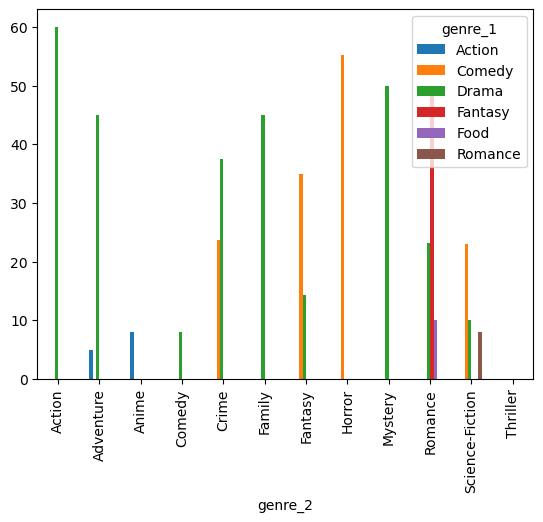

In [161]:
grouped_ser_gen = df_series_gen.groupby(['genre_1','genre_2']).mean()['runtime']
print(grouped_ser_gen[0:10])
(grouped_ser_gen.unstack(level=0).plot.bar())
plt.show()

In [162]:
def get_domain(url):
    parsed_url = urlparse(url)
    if parsed_url.netloc:
        return parsed_url.netloc
    else:
        return None

df_embedded['domain'] = df_embedded['_embedded.show.officialSite'].apply(get_domain)

print(df_embedded)

         id  _embedded.show.id  \
0   2604879              63169   
1   2610181              69820   
2   2598421              69937   
3   2599349              40916   
4   2561116              54033   
..      ...                ...   
86  2544464               2266   
87  2560157              33200   
88  2617225              55227   
89  2599200              69940   
90  2612115                922   

                                   _embedded.show.url   _embedded.show.name  \
0   https://www.tvmaze.com/shows/63169/na-straze-p...       На страже пляжа   
1        https://www.tvmaze.com/shows/69820/zamaacnyj             Замаячный   
2    https://www.tvmaze.com/shows/69937/posledovateli         Последователи   
3      https://www.tvmaze.com/shows/40916/61st-street           61st Street   
4   https://www.tvmaze.com/shows/54033/wu-shen-zhu...       Wu Shen Zhu Zai   
..                                                ...                   ...   
86          https://www.tvmaze.com/sho

In [180]:
df_embedded['domain'].unique()

array(['premier.one', None, 'www.stan.com.au', 'v.qq.com', 'v.youku.com',
       'w.mgtv.com', 'www.bbc.co.uk', 'www.njpw1972.com', 'v.youku.tv',
       'program.kbs.co.kr', 'www.youtube.com',
       'www.insideofyoupodcast.com', 'www.netflix.com', 'start.ru',
       'www.paramountplus.com', 'www.iq.com', 'www.peacocktv.com',
       'www.hulu.com', 'www.wwe.com', 'www.svtplay.se', 'gshow.globo.com',
       'play.tv2.no', 'ufc.com'], dtype=object)

In [164]:
df_series_gen = pd.merge(df_series_gen, df_embedded, left_on="id", right_on="id", how="left")
print(df_series_gen)

         id                                                url           name  \
0   2604879  https://www.tvmaze.com/episodes/2604879/na-str...       Серия 13   
1   2610181  https://www.tvmaze.com/episodes/2610181/zamaac...        Серия 3   
2   2598421  https://www.tvmaze.com/episodes/2598421/posled...       Серия 03   
3   2599349  https://www.tvmaze.com/episodes/2599349/61st-s...      The Offer   
4   2561116  https://www.tvmaze.com/episodes/2561116/wu-she...    Episode 357   
..      ...                                                ...            ...   
86  2544464  https://www.tvmaze.com/episodes/2544464/wwe-nx...     Episode 32   
87  2560157  https://www.tvmaze.com/episodes/2560157/forsta...      Avsnitt 9   
88  2617225  https://www.tvmaze.com/episodes/2617225/no-lim...     Episódio 7   
89  2599200  https://www.tvmaze.com/episodes/2599200/politi...  Brann i blokk   
90  2612115  https://www.tvmaze.com/episodes/2612115/the-ul...     Episode 11   

    season  number     type

<AxesSubplot:xlabel='domain'>

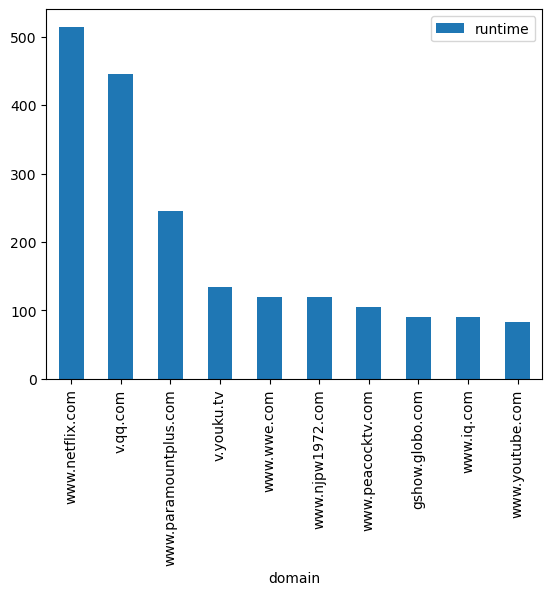

In [165]:
sum_runtime_dom = df_series_gen.groupby('domain').sum()['runtime'].sort_values(ascending=False)
sum_runtime_dom.reset_index().sort_values(by='runtime',ascending=False).iloc[0:10].plot(kind='bar',x='domain', y='runtime')


<AxesSubplot:xlabel='genre_1'>

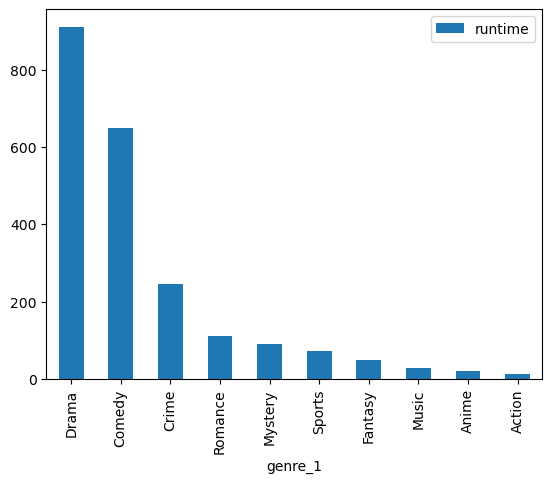

In [181]:
sum_runtime_gen = df_series_gen.groupby('genre_1').sum()['runtime'].sort_values(ascending=False)
sum_runtime_gen.reset_index().sort_values(by='runtime',ascending=False).iloc[0:10].plot(kind='bar',x='genre_1', y='runtime')

Creacion de archivos Parquet compresion Snappy


In [176]:
def df_to_parquet(dataframes, folder):

    if not os.path.exists(folder):
        os.makedirs(folder)
   
    for index, df in enumerate(dataframes):
        filename = os.path.join(folder, f'dataframe_{index}.parquet')
        df.to_parquet(filename, index=False, compression='snappy')
        print(f"DataFrame {index} guardado como {filename}")


dataframes_list = [df_series, df_countries, df_rating, df_series_data, df_links, df_embedded, df_show_genres_exp]

# Ruta donde se guardarán los archivos Parquet
folder = '../data/'

# Llamar a la función para guardar los DataFrames en formato Parquet comprimido en Snappy
df_to_parquet(dataframes_list, folder)


DataFrame 0 guardado como ../data/dataframe_0.parquet
DataFrame 1 guardado como ../data/dataframe_1.parquet
DataFrame 2 guardado como ../data/dataframe_2.parquet
DataFrame 3 guardado como ../data/dataframe_3.parquet
DataFrame 4 guardado como ../data/dataframe_4.parquet
DataFrame 5 guardado como ../data/dataframe_5.parquet
DataFrame 6 guardado como ../data/dataframe_6.parquet


In [177]:
def df_to_csv(dataframes, folder):

    if not os.path.exists(folder):
        os.makedirs(folder)
   
    for index, df in enumerate(dataframes):
        filename = os.path.join(folder, f'dataframe_{index}.csv')
        df.to_csv(filename, index=False)
        print(f"DataFrame {index} guardado como {filename}")


dataframes_list = [df_series, df_countries, df_rating, df_series_data, df_links, df_embedded, df_show_genres_exp]

# Ruta donde se guardarán los archivos Parquet
folder = '../csv/'

# Llamar a la función para guardar los DataFrames en formato Parquet comprimido en Snappy
df_to_csv(dataframes_list, folder)

DataFrame 0 guardado como ../csv/dataframe_0.csv
DataFrame 1 guardado como ../csv/dataframe_1.csv
DataFrame 2 guardado como ../csv/dataframe_2.csv
DataFrame 3 guardado como ../csv/dataframe_3.csv
DataFrame 4 guardado como ../csv/dataframe_4.csv
DataFrame 5 guardado como ../csv/dataframe_5.csv
DataFrame 6 guardado como ../csv/dataframe_6.csv
